Jared Crebo 30085839

PHYS 381: Assignment 4

Fourier analysis using Python

Kernel: Python 3.10.11 | IDE: Visual Studio Code

2 Fourier transform for non-periodic functions

In [20]:
import numpy as np
import matplotlib.pyplot as plt

Discrete Fourier Transform

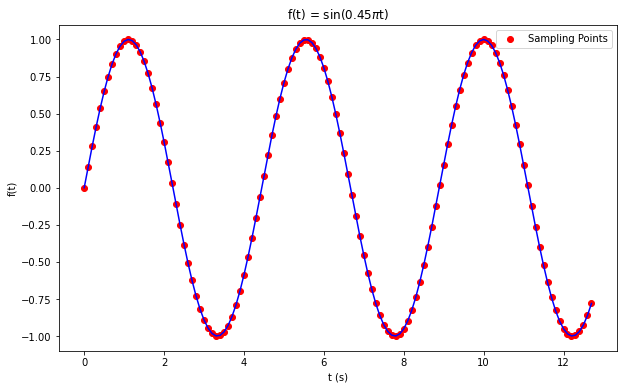

In [21]:
N = 128 # Number of sampling points
H = 0.1 # Step size between samples
tau = N*H # Total time
M = np.linspace(0,N-1,N) # array of steps
t = np.linspace(0,tau,N, endpoint=False) # array of time

# Define original function
def function(t):
    return np.sin(0.45*np.pi*t)

fig, ax = plt.subplots(figsize=[10,6])
# Plot original function against time
ax.plot(t, function(t), color = 'blue')
# Plot sample points along function
ax.scatter(t, function(t), color = 'red', label = 'Sampling Points')
ax.legend()
ax.set_xlabel("t (s)")
ax.set_ylabel("f(t)")
ax.set_title("f(t) = sin(0.45$\pi$t)")

def re(fm, m, n, N, h):
    '''
    Returns real component of function Fn from fm
    fm - original function
    m - iterative index
    n - iterative index
    N - total sampling points
    h - step size
    '''
    return fm(m*h) * np.cos(2*np.pi*m*n/N)

def im(fm, m, n, N, h):
    '''
    Returns imaginary component of function Fn from fm
    fm - original function
    m - iterative index
    n - iterative index
    N - total sampling points
    h - step size
    '''
    return fm(m*h) * np.sin(2*np.pi*m*n/N)

Sampling Rate vs = 10.0 Hz
 v1 = 0.078125 Hz
Dominant Frequency = [0.234375] Hz at n = [3.]


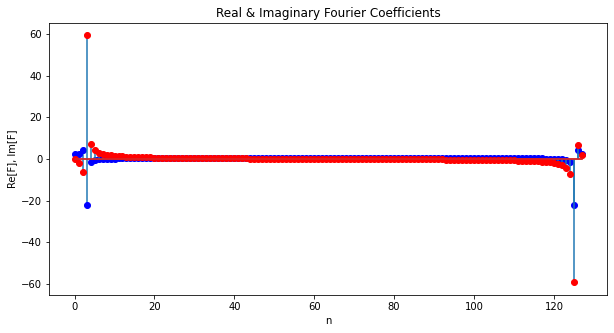

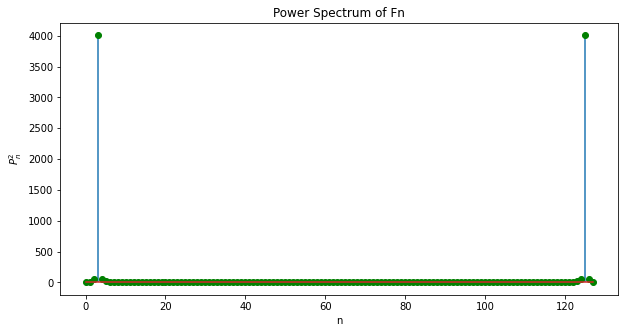

In [22]:
# Print sampling rate and first frequency
print('Sampling Rate vs =',1/H,'Hz\n','v1 =',1/(N*H),'Hz')

def real_imag(func, N, h):
    '''
    Returns the real, imaginary, and power spectrum of Discrete Fourier Transform (DFT)
    func - original function
    N - total sampling points
    h - step size
    '''
    real = np.zeros(N)
    imag = np.zeros(N)
    f = np.zeros(N)
    for n in range(N):
        for m in range(N):
            # Calculate real component of DFT
            real[n] += re(func, m, n, N, h)
            # Calculate imaginary component of DFT
            imag[n] += im(func, m, n, N, h)
    # Calculate power spectrum of DFT
    power_spec = real**2 + imag**2
    return real, imag, power_spec

# Calculate real, imaginary, and power spectrum for function
real, imag, power_spec = real_imag(function, N, H)

fig, ax = plt.subplots(figsize=[10,5])
# Plot real and imaginary components
ax.stem(M, real, markerfmt = 'bo', label = 'Re[F]')
ax.stem(M, imag, markerfmt = 'ro', label = 'Im[F]')
ax.set_xlabel("n")
ax.set_ylabel("Re[F], Im[F]")
ax.set_title("Real & Imaginary Fourier Coefficients")

fig, ax = plt.subplots(figsize=[10,5])
# Plot power spectrum
ax.stem(M, power_spec, markerfmt = 'go', label = 'Power Spectrum')
ax.set_xlabel("n")
ax.set_ylabel("$P^2_n$")
ax.set_title("Power Spectrum of Fn")

# Locate dominant frequency in power spectrum
n_max = M[np.where(power_spec == max(power_spec))]
vn = n_max / tau
print('Dominant Frequency =',vn,'Hz at n =',n_max)

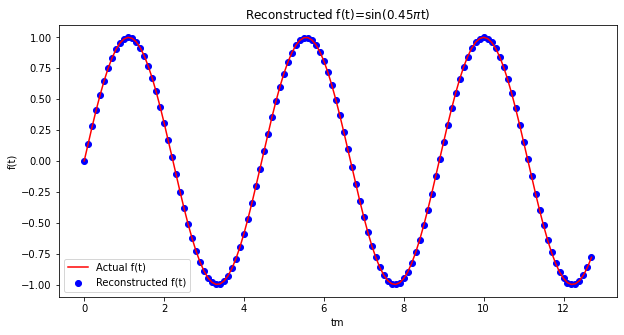

In [23]:
def reconstruct(real, imag, N):
    '''
    Reconstruct original function using DFT
    real - array of real components of f(t)
    imag - array of imaginary components of f(t)
    N - total sampling points
    '''
    f = np.zeros(N)
    for m in range(N):
        for n in range(N):
            # Calculate fourier transform at each step m
            f[m] += real[n] * np.cos(2*np.pi*m*n/N) + imag[n] * np.sin(2*np.pi*m*n/N)
    f /= N
    # Return the discrete fourier transform
    return f

# Reconstruct original function
f = reconstruct(real, imag, N)

fig, ax = plt.subplots(figsize=[10,5])
# Plot actual and reconstructed functions for comparison
ax.plot(t,function(t), color = 'red' , label = 'Actual f(t)')
ax.scatter(t, f, color = 'blue', label = 'Reconstructed f(t)')
ax.set_xlabel("tm")
ax.set_ylabel("f(t)")
ax.set_title("Reconstructed f(t)=sin(0.45$\pi$t)")
ax.legend()

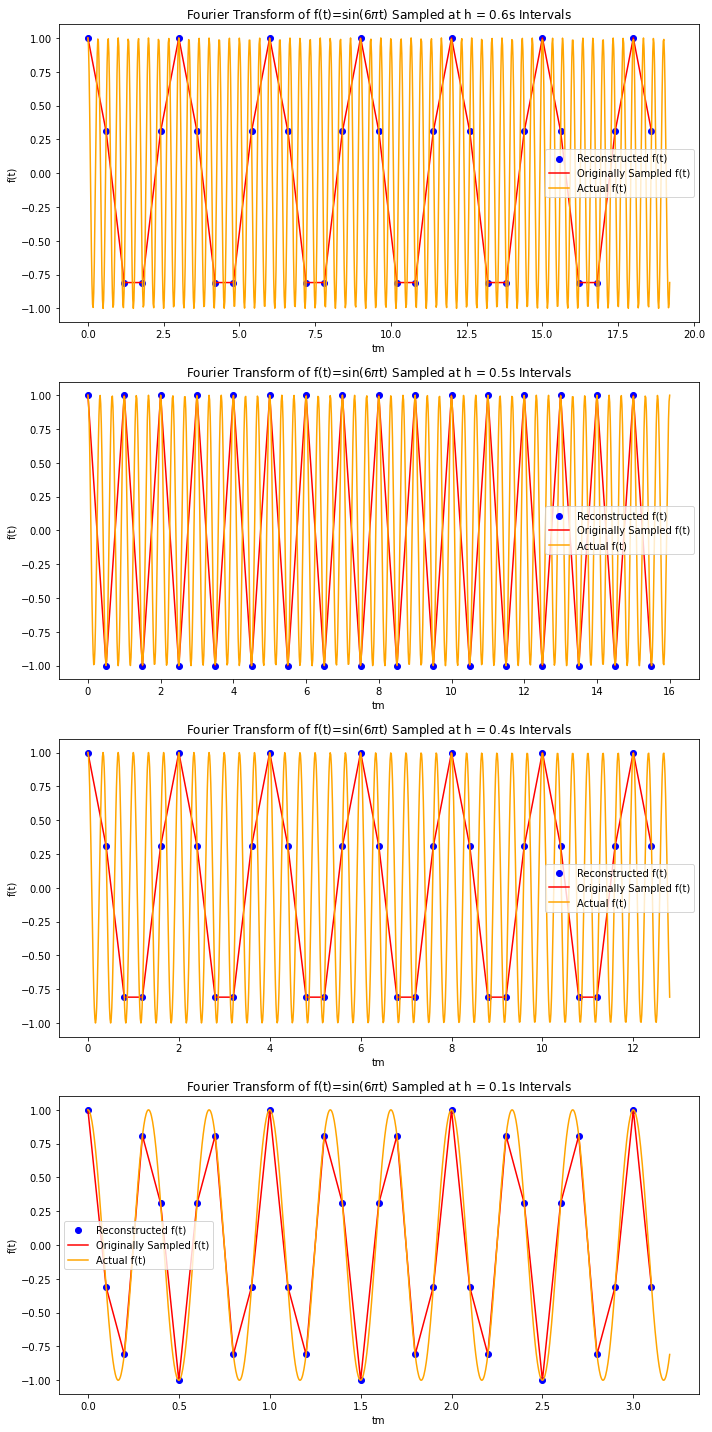

In [ ]:
# Define new function
def function1(t):
    return np.cos(6*np.pi*t)


N = 32 # Total sampling points
H = [0.6, 0.5, 0.4, 0.1] # Changing step size for comparison
M = np.linspace(0,N-1,N) # Steps

f = np.empty([len(H),N])
for i in range(len(H)): # For each different step size
    # Conduct a Discrete Fourier Transform and store in matrix f
    real, imag, power_spec = real_imag(function1, N, H[i])
    f[i,:] = reconstruct(real, imag, N)


fig, ax = plt.subplots(4,1,figsize=[10,20])
# Plot the original and reconstructed functions for each different step size to compare
for i in range(len(H)):
    ax[i].scatter(M*H[i], f[i,:], color = 'blue', label = 'Reconstructed f(t)')
    ax[i].plot(M*H[i],function1(M*H[i]),color = 'red', label = 'Originally Sampled f(t)')
    ax[i].plot(np.linspace(0,N*H[i],1000), function1(np.linspace(0,N*H[i],1000)), color = 'orange', label = 'Actual f(t)')
    ax[i].set_xlabel("tm")
    ax[i].set_ylabel("f(t)")
    ax[i].set_title("Fourier Transform of f(t)=sin(6$\pi$t) Sampled at h = "+str(H[i])+"s Intervals")
    ax[i].legend()
fig.tight_layout()

2.2b Radio and TV Transmission

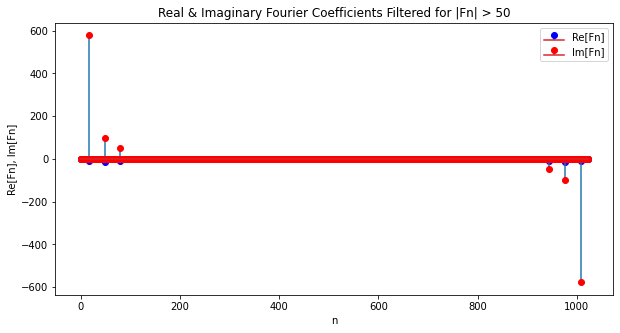

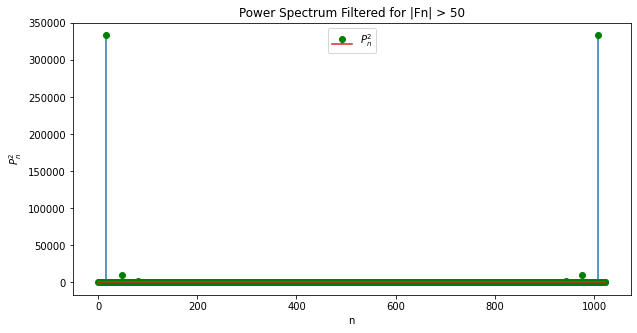

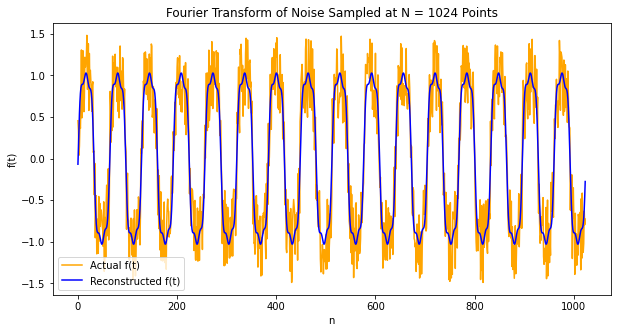

In [ ]:
# Load data from txt file
pitch = np.loadtxt('pitch.txt',delimiter=' ')

N = len(pitch) # Number of sampling points is number of data points
e = 50 # Threshold for noise filtration in fourier coefficients
t = np.linspace(0,N-1,N) # time domain


def re_data(fm, m, n, N):
    '''
    Returns real component of function Fn from fm
    fm - dataset
    m - iterative index
    n - iterative index
    N - total sampling points
    h - step size
    '''
    return fm[m] * np.cos(2*np.pi*m*n/N)

def im_data(fm, m, n, N):
    '''
    Returns imaginary component of function Fn from fm
    fm - dataset
    m - iterative index
    n - iterative index
    N - total sampling points
    h - step size
    '''
    return fm[m] * np.sin(2*np.pi*m*n/N)


def real_imag(func, N):
    '''
    Returns the real, imaginary, and power spectrum of Discrete Fourier Transform (DFT)
    func - original function
    N - total sampling points
    h - step size
    Function includes filtration threshold e to filter noise in data
    '''
    real = np.zeros(N)
    imag = np.zeros(N)
    f = np.zeros(N)
    for n in range(N):
        for m in range(N):
            # Calculate real component of DFT
            real[n] += re_data(func, m, n, N)
            # Calculate imaginary component of DFT
            imag[n] += im_data(func, m, n, N)
        if np.sqrt(real[n]**2 + imag[n]**2) < e:
            # Set fourier coefficient to zero if power spectra is below threshold
            real[n] = 0
            imag[n] = 0
    # Calculate power spectrum of DFT
    power_spec = real**2 + imag**2
    return real, imag, power_spec

# Conduct Discrete Fourier Transform of pitch data
real, imag, power_spec = real_imag(pitch, N)
f = reconstruct(real, imag, N)

fig, ax = plt.subplots(figsize=[10,5])
# Plot real and imaginary components of DFT
ax.stem(t, real, markerfmt = 'bo', label = 'Re[Fn]')
ax.stem(t, imag, markerfmt = 'ro', label = 'Im[Fn]')
ax.set_xlabel("n")
ax.set_ylabel("Re[Fn], Im[Fn]")
ax.set_title("Real & Imaginary Fourier Coefficients Filtered for |Fn| > "+str(e))
ax.legend()

fig, ax = plt.subplots(figsize=[10,5])
# Plot power spectrum of DFT
ax.stem(t, power_spec, markerfmt = 'go', label = '$P^2_n$')
ax.set_xlabel("n")
ax.set_ylabel("$P^2_n$")
ax.set_title('Power Spectrum Filtered for |Fn| > '+str(e))
ax.legend()

fig, ax = plt.subplots(figsize=[10,5])
# Plot actual and reconstructed functions to demonstrate noise filtration
ax.plot(t,pitch, color = 'orange', label = 'Actual f(t)')
ax.plot(t, f, color = 'blue', label = 'Reconstructed f(t)')
ax.set_xlabel("n")
ax.set_ylabel("f(t)")
ax.set_title("Fourier Transform of Noise Sampled at N = "+str(N)+" Points")
ax.legend()
